In [1]:
!conda install --yes --quiet pymongo




# All requested packages already installed.
# packages in environment at /opt/conda:
#
pymongo                   3.4.0                    py36_0    defaults


In [90]:
import pymongo
import sys
import warnings
warnings.filterwarnings("ignore")

In [20]:
import matplotlib.pyplot as plt
import re
import requests
import pandas as pd
import numpy as np

#### Importing Machine Learning DataFrame

In [241]:
machine_learning_md3_df.to_pickle('../pickle_jar/machine_learning_md3_df.p')

In [3]:
machine_learning_md3_df = pd.read_pickle('../pickle_jar/machine_learning_md3_df.p')

In [4]:
machine_learning_md3_df.tail()

,ns,pageid,title,Category,Text
1527,0,11273721,Hierarchical temporal memory,Machine Learning,Hierarchical temporal memory HTM is a biologic...
1528,0,33742232,Restricted Boltzmann machine,Machine Learning,A restricted Boltzmann machine RBM is a genera...
1529,0,76996,Self-organizing map,Machine Learning,A selforganizing map SOM or selforganizing fea...
1530,0,48813654,Sparse dictionary learning,Machine Learning,Sparse dictionary learning is a representation...
1531,0,47805,Vector quantization,Machine Learning,Vector quantization VQ is a classical quantiza...


In [5]:
# machine_learning_md3_df['Text'][177] = get_page_contents(1579244)
machine_learning_md3_df.head()

,ns,pageid,title,Category,Text
0,0,43385931,Data exploration,Machine Learning,Data exploration is an approach similar to ini...
1,0,49082762,List of datasets for machine learning research,Machine Learning,These datasets are used for machinelearning re...
2,0,233488,Machine learning,Machine Learning,Machine learning is a field of computer scienc...
3,0,53587467,Outline of machine learning,Machine Learning,The following outline is provided as an overvi...
4,0,3771060,Accuracy paradox,Machine Learning,The accuracy paradox for predictive analytics ...


#### Importing Business Software Dataframe

In [11]:
business_software_md3_df.shape

(4121, 5)

In [7]:
business_software_md3_df.tail()

,ns,pageid,title,Category,Text
4116,0,1577008,Ted (word processor),Business Software,Ted is a word processor for the X Window Syste...
4117,0,37628014,Thorn EMI Liberator,Business Software,The Thorn EMI Liberator was a laptop word proc...
4118,0,34306381,Trelby,Business Software,Trelby is a free and open source screenwriting...
4119,0,29902828,Word Juggler,Business Software,Word Juggler was a word processor application ...
4120,0,826279,WordMARC,Business Software,WordMARC was a scientifically oriented word pr...


In [9]:
business_software_md3_df.to_pickle('../pickle_jar/business_software_md3_df.p')

###this DF contains ~4120 articles.

In [6]:
business_software_md3_df = pd.read_pickle('../pickle_jar/business_software_md3_df.p')

In [314]:
bs_dict = business_software_md3_df.to_dict('list')

### Combining both dataframes into 1


In [8]:
###creating new indexes in order to concatenate

bs_index_new_list = []
for i in range(2000, 6121):
    bs_index_new_list.append(i)
    
business_software_md3_df.index = bs_index_new_list


business_software_md3_df.tail()

,ns,pageid,title,Category,Text
6116,0,1577008,Ted (word processor),Business Software,Ted is a word processor for the X Window Syste...
6117,0,37628014,Thorn EMI Liberator,Business Software,The Thorn EMI Liberator was a laptop word proc...
6118,0,34306381,Trelby,Business Software,Trelby is a free and open source screenwriting...
6119,0,29902828,Word Juggler,Business Software,Word Juggler was a word processor application ...
6120,0,826279,WordMARC,Business Software,WordMARC was a scientifically oriented word pr...


In [10]:
dataframes = [machine_learning_md3_df, business_software_md3_df]
corpus = pd.concat(dataframes)
corpus.head()

,ns,pageid,title,Category,Text
0,0,43385931,Data exploration,Machine Learning,Data exploration is an approach similar to ini...
1,0,49082762,List of datasets for machine learning research,Machine Learning,These datasets are used for machinelearning re...
2,0,233488,Machine learning,Machine Learning,Machine learning is a field of computer scienc...
3,0,53587467,Outline of machine learning,Machine Learning,The following outline is provided as an overvi...
4,0,3771060,Accuracy paradox,Machine Learning,The accuracy paradox for predictive analytics ...


In [5]:
corpus.shape
## (5653, 6) is good

(5653, 6)

In [16]:
corpus.to_pickle('../pickle_jar/corpus.p')

In [4]:
corpus = pd.read_pickle('../pickle_jar/corpus.p')

,ns,pageid,title,Category,Text,Text_numerical
0,0,43385931,Data exploration,Machine Learning,Data exploration is an approach similar to ini...,922
1,0,49082762,List of datasets for machine learning research,Machine Learning,These datasets are used for machinelearning re...,3624
2,0,233488,Machine learning,Machine Learning,Machine learning is a field of computer scienc...,2112
3,0,53587467,Outline of machine learning,Machine Learning,The following outline is provided as an overvi...,3549
4,0,3771060,Accuracy paradox,Machine Learning,The accuracy paradox for predictive analytics ...,3512


#### Label Encode the Articles `'text'`, just to see the # of words in each article

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
corpus['Text_numerical'] = le.fit_transform(corpus['Text'])

In [15]:
corpus.tail()

,ns,pageid,title,Category,Text,Text_numerical
6116,0,1577008,Ted (word processor),Business Software,Ted is a word processor for the X Window Syste...,3280
6117,0,37628014,Thorn EMI Liberator,Business Software,The Thorn EMI Liberator was a laptop word proc...,3491
6118,0,34306381,Trelby,Business Software,Trelby is a free and open source screenwriting...,3724
6119,0,29902828,Word Juggler,Business Software,Word Juggler was a word processor application ...,3902
6120,0,826279,WordMARC,Business Software,WordMARC was a scientifically oriented word pr...,3905


### Text Vectorize the `corpus`

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english')

In [9]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(corpus.Text)

In [10]:
document_term_matrix_sps

<5653x97117 sparse matrix of type '<class 'numpy.float64'>'
	with 1342211 stored elements in Compressed Sparse Row format>

In [12]:
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=corpus.index,
                                       columns=tfidf_vectorizer.get_feature_names())

document_term_matrix_df.head()

,00,000,000001,00001,0001,00010782,000198,000198ttt01584tft000198ttt0288ttf01584tft00tfffrac,0001l,0002,...,高橋書店ゲーム攻略本シリーズ,사이버메드,자이오넥스,훈민정음,ﬁnitelength,ﬂexibility,ﬂock,ﬂocking,ﬂow,ａ列車で行こうｍｄ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
pd.concat([corpus.Text, document_term_matrix_df], axis=1).sample(5)

,Text,00,000,000001,00001,0001,00010782,000198,000198ttt01584tft000198ttt0288ttf01584tft00tfffrac,0001l,...,高橋書店ゲーム攻略本シリーズ,사이버메드,자이오넥스,훈민정음,ﬁnitelength,ﬂexibility,ﬂock,ﬂocking,ﬂow,ａ列車で行こうｍｄ
4859,Swiftype is a software company based in San Fr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5616,Splice is a cloudbased music creation and coll...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2317,An educational management information system E...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2719,Experticity is a Salt Lake City Utahbased comp...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,Raymond Bernard Cattell PhD DSc 20 March 1905 ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
document_term_matrix_df.to_pickle('../pickle_jar/document_term_matrix_df.p')

In [ ]:
document_term_matrix_df = pd.read_pickle('../pickle_jar/document_term_matrix_df.p')

### Compute SVD of Document Term Matrix

In [15]:
from sklearn.decomposition import TruncatedSVD

In [25]:
document_term_matrix_df.shape

(5653, 97117)

In [16]:
## 1st iteration = 50 components
## 2nd iteration = 250 components
## 3rd iteration = 1000 components (takes a long time! memory error!)

n_components = 50
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [17]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)

In [18]:
svd_matrix.shape

(5653, 50)

In [44]:
svd_df = pd.DataFrame(svd_matrix, 
                      index=document_term_matrix_df.index, 
                      columns=component_names)

In [38]:
sum(SVD.explained_variance_ratio_)



0.29991271576854678

##### 0.135 explained variance for 50 components seems pretty bad .  Must be all the jibberish we extracted.  Perhaps we need to `Beautiful_Soup` ---> `Prettify()`

##### 0.30 explained variance for 250 components is better.  Still not great.

##### Unknown explained variance for 1000 components. `MemoryError:`

### Scree plots

In [22]:
%matplotlib inline

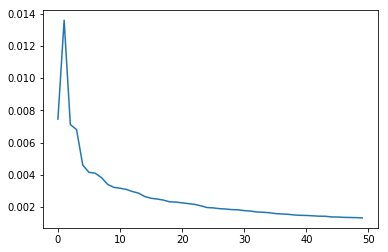

In [23]:
plt.plot(SVD.explained_variance_ratio_)


<Container object of 50 artists>

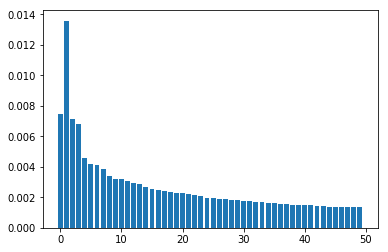

In [24]:
plt.bar(range(50), SVD.explained_variance_ratio_)

#### cumulative explained variance

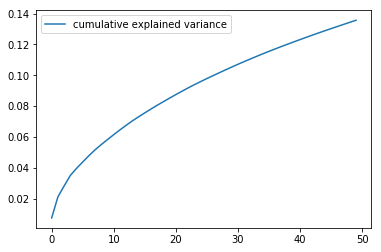

In [25]:
plt.plot(range(50), np.cumsum(SVD.explained_variance_ratio_), label='cumulative explained variance')
plt.legend()

### LoadSVD Matrix with Documents and Labels

In [29]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=document_term_matrix_df.index,
                                        columns=component_names)
# latent_semantic_analysis['sentence'] = corpus_df.sentence
latent_semantic_analysis['category'] = corpus['Category']
latent_semantic_analysis.tail()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_42,component_43,component_44,component_45,component_46,component_47,component_48,component_49,component_50,category
6116,0.076394,-0.076488,-0.005793,-0.006350,0.048970,0.082888,0.123152,0.005935,0.088548,0.015045,...,0.032772,0.001398,-0.012399,-0.009536,0.011110,-0.018541,-0.032912,0.014532,0.053540,Business Software
6117,0.046260,-0.046353,-0.000080,0.013365,-0.015386,0.012673,0.015346,-0.004355,0.010441,0.008053,...,0.002713,0.012706,-0.015981,0.001031,0.002301,-0.006556,-0.000946,-0.001139,0.012956,Business Software
6118,0.056335,-0.066986,-0.014913,-0.000148,0.058074,0.018677,0.009319,-0.017141,0.038934,0.023149,...,-0.003844,0.045238,-0.003277,-0.005409,0.007486,-0.017446,0.029534,0.000720,-0.003525,Business Software
6119,0.063006,-0.065104,-0.007100,0.009139,0.004165,0.043055,0.106209,0.003216,0.058906,0.024839,...,0.010524,0.036034,-0.022534,-0.008819,-0.028924,-0.018923,-0.006421,0.006584,0.031946,Business Software
6120,0.102328,-0.081250,0.010216,-0.000056,0.001586,0.077446,0.100564,0.027297,0.043858,0.016158,...,-0.004351,0.005456,0.017544,-0.008048,0.017096,0.013877,0.020788,0.015012,0.031691,Business Software


In [30]:
vocabulary_expression = pd.DataFrame(SVD.components_,
                                     index=component_names,
                                     columns=tfidf_vectorizer.get_feature_names()).T

In [32]:
vocabulary_expression.shape

(97117, 50)

In [33]:
### for loop adds absolute component for each 
for i in range(1,11):
    vocabulary_expression['abs_component_{}'.format(i)] = np.abs(vocabulary_expression['component_{}'.format(i)])

    
vocabulary_expression.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,abs_component_1,abs_component_2,abs_component_3,abs_component_4,abs_component_5,abs_component_6,abs_component_7,abs_component_8,abs_component_9,abs_component_10
00,0.003303,3.048525e-03,-0.000217,0.000160,-0.000098,0.000635,-0.000162,0.002210,0.000790,-5.695786e-04,...,0.003303,3.048525e-03,0.000217,0.000160,0.000098,0.000635,0.000162,0.002210,0.000790,5.695786e-04
000,0.001767,-7.613063e-04,-0.001559,0.000232,-0.001911,0.003591,-0.000760,-0.002515,0.001162,-5.902408e-04,...,0.001767,7.613063e-04,0.001559,0.000232,0.001911,0.003591,0.000760,0.002515,0.001162,5.902408e-04
000001,0.000033,9.778232e-07,0.000061,-0.000020,-0.000001,0.000084,0.000007,0.000124,0.000045,-2.173286e-05,...,0.000033,9.778232e-07,0.000061,0.000020,0.000001,0.000084,0.000007,0.000124,0.000045,2.173286e-05
00001,0.000061,6.549721e-05,-0.000060,0.000035,-0.000008,0.000002,-0.000002,0.000006,0.000001,-4.441183e-07,...,0.000061,6.549721e-05,0.000060,0.000035,0.000008,0.000002,0.000002,0.000006,0.000001,4.441183e-07
0001,0.000239,2.064113e-04,-0.000061,0.000052,-0.000053,0.000107,-0.000070,0.000269,0.000052,1.033830e-04,...,0.000239,2.064113e-04,0.000061,0.000052,0.000053,0.000107,0.000070,0.000269,0.000052,1.033830e-04


### Top Terms for each Component

##### Component 1 - must describe Machine Learning

In [34]:
vocabulary_expression['abs_component_1'].sort_values(ascending=False).head(7)


displaystyle    0.558040
learning        0.147150
data            0.141271
software        0.139517
management      0.116376
algorithm       0.099365
model           0.093563
Name: abs_component_1, dtype: float64

##### Component 2 - must describe Machine Learning

In [35]:
vocabulary_expression['abs_component_2'].sort_values(ascending=False).head(7)


displaystyle    0.617747
software        0.199651
management      0.176856
project         0.126636
business        0.105961
company         0.099683
mathbf          0.097498
Name: abs_component_2, dtype: float64

##### Component 3 - probably describe Machine Learning

In [36]:
vocabulary_expression['abs_component_3'].sort_values(ascending=False).head(7)


displaystyle    0.383222
neural          0.337359
learning        0.292294
network         0.205640
networks        0.203189
game            0.146263
management      0.129075
Name: abs_component_3, dtype: float64

##### Component 4 - probably describes Business Software

In [37]:
vocabulary_expression['abs_component_4'].sort_values(ascending=False).head(7)


game             0.673554
tycoon           0.289396
player           0.252984
players          0.178943
games            0.172267
park             0.128943
rollercoaster    0.125206
Name: abs_component_4, dtype: float64

##### Component 5 - probably describes Business Software

In [38]:
vocabulary_expression['abs_component_5'].sort_values(ascending=False).head(7)


adempiere     0.229620
company       0.200032
metasfresh    0.198316
source        0.191504
health        0.180021
open          0.176766
project       0.174974
Name: abs_component_5, dtype: float64

##### Component 6 - probably describes Business Software

In [39]:
vocabulary_expression['abs_component_6'].sort_values(ascending=False).head(7)


erp          0.269644
health       0.261648
neural       0.219576
business     0.165293
crm          0.157306
adempiere    0.151997
dynamics     0.150622
Name: abs_component_6, dtype: float64

##### Component 7 - probably describes Business Software

In [40]:
vocabulary_expression['abs_component_7'].sort_values(ascending=False).head(7)


microsoft     0.335088
office        0.273614
health        0.262821
adempiere     0.198110
word          0.168914
metasfresh    0.163341
erp           0.147111
Name: abs_component_7, dtype: float64

##### Component 8 - probably describes Business Software

In [41]:
vocabulary_expression['abs_component_8'].sort_values(ascending=False).head(7)


neural       0.304292
health       0.293373
network      0.202503
genetic      0.188663
networks     0.180825
medical      0.165913
algorithm    0.130789
Name: abs_component_8, dtype: float64

##### Component 9 - probably describes Business Software

In [42]:
vocabulary_expression['abs_component_9'].sort_values(ascending=False).head(7)


microsoft     0.310659
content       0.285350
dynamics      0.224848
adempiere     0.213226
office        0.207750
metasfresh    0.188507
management    0.184971
Name: abs_component_9, dtype: float64

##### Component 10 - probably describes Business Software

In [43]:
vocabulary_expression['abs_component_10'].sort_values(ascending=False).head(7)


project       0.356277
software      0.270946
oracle        0.208099
dynamics      0.183191
java          0.182521
health        0.178355
management    0.170109
Name: abs_component_10, dtype: float64

### Searching for most related articles to the Search Terms - Machine Learning

In [62]:
search_term1 = "Machine Learning"


In [63]:
search_term_vec1 = tfidf_vectorizer.transform([search_term1])

In [64]:
search_term_lsa1 = SVD.transform(search_term_vec1)

In [70]:
cosine_similarities1 = latent_semantic_analysis.values.dot(search_term_lsa1.T).ravel()
### Had to use .values to turn latent_semantic_analysis to an array
### .ravel() does not work on dataframes, only arrays

In [72]:
cosine_similarities1.argsort()[:-6:-1]
#SORTING BY VALUES IN COSINE SIMILARITIES... RETURNING LAST 5 INDICES
### these are the indices which correlate most closely to "Machine Learning"

array([  2,   3, 120, 137, 746])

In [95]:
corpus.iloc[[2,3,120,137,746], :]

,ns,pageid,title,Category,Text,Text_numerical
2,0,233488,Machine learning,Machine Learning,Machine learning is a field of computer scienc...,2112
3,0,53587467,Outline of machine learning,Machine Learning,The following outline is provided as an overvi...,3549
120,0,4615464,Meta learning (computer science),Machine Learning,Meta learning is a subfield of machine learnin...,2183
137,0,10748030,Offline learning,Machine Learning,In machine learning systems which employ offli...,1677
746,0,387537,Computational learning theory,Machine Learning,In computer science computational learning the...,1595


 - the above articles are most similar to the search for `Machine Learning`

### Searching for most related articles to the Search Terms - Business Software

In [84]:
search_term2 = "Business Software"

In [85]:
search_term_vec2 = tfidf_vectorizer.transform([search_term2])
search_term_lsa2 = SVD.transform(search_term_vec2)

In [86]:
cosine_similarities2 = latent_semantic_analysis.values.dot(search_term_lsa2.T).ravel()


In [87]:
cosine_similarities2.argsort()[:-6:-1]


array([1760, 1532, 3227, 1621, 3228])

In [96]:
corpus.iloc[[1760, 1532, 3227, 1621, 3228], :]

,ns,pageid,title,Category,Text,Text_numerical
2228,0,2269864,Small business software,Business Software,Small business software refers to software spe...,3075
2000,0,1037763,Business software,Business Software,Business software or a business application is...,628
3695,0,13277642,Accounting software,Business Software,Accounting software describes a type of applic...,245
2089,0,2302514,Enterprise software,Business Software,Enterprise software also known as enterprise a...,1124
3696,0,2405553,Comparison of accounting software,Business Software,The following comparison of accounting softwar...,3540


 - the above articles are most similar to the search for `Business Software`